# Retail Data Analytics
## Notebook  by <span style='color:blue '> Kamau Dennis</span> 

### Context
The Challenge - One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.

### Content
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales 

### Stores
Anonymized information about the 45 stores, indicating the type and size of store

### Features
Contains additional data related to the store, department, and regional activity for the given dates.
   - Store - the store number
   - Date - the week
   - Temperature - average temperature in the region
   - Fuel_Price - cost of fuel in the region
   - MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
   - CPI - the consumer price index
   - Unemployment - the unemployment rate
   - IsHoliday - whether the week is a special holiday week

### Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:
   - Store - the store number
   - Dept - the department number
   - Date - the week
   - Weekly_Sales -  sales for the given department in the given store
   - IsHoliday - whether the week is a special holiday week

### The Task
 - Predict the department-wide sales for each store for the following year
 - Model the effects of markdowns on sales

In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set() 

In [53]:
#getting data
features_df = pd.read_csv('datasets/archive(1)/Features data set.csv',parse_dates=True)
sales_df = pd.read_csv('datasets/archive(1)/sales data-set.csv',parse_dates=True)
stores_df = pd.read_csv('datasets/archive(1)/stores data-set.csv')

### Checking the data
The next step is to look at the data we are working with.We have been provided with three datasets so lets first merge them to one dataset.

In [54]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [55]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [56]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [57]:
#merge dataframes
feature_sal = pd.merge(features_df,sales_df)
data = pd.merge(feature_sal,stores_df)
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


Each row represent one department of each store.There are 16 attributes.Markdown 1-4 are all null values but we were told that MarkDown only starts from the month of November.

Lets get a quick description of the data,particularly the total number of rows,each attribute's type and number of non null values.For this we will use the info() method.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Date            421570 non-null object
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday       421570 non-null bool
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


There are 421570 instances in the dataset.Only MarkDown attribute contains null values.

Most attributes are numeric,except date ,isholiday and type.Date and Type are object which can hold any kind of python object.But since we loaded the dataset from csv file,then they must be a text attribute.IsHoliday is a boolean data type.

Since this is a time series problem we need to parse the Date attribute to a datetime object and set it as index.

In [59]:
#parsing dates
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index(["Date"])
data.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
Date,,,,,,,,,,,,,,,
2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


Also we need to take care of missing values in markdown 1 to 5.We have three options:
  - Get rid of the corresponding stores
  - Get rid of the whole attribute
  - Set the values to some value
  
However,we have been advised that markdowns are important.Therefore,we will set the missing values to zero.  

In [60]:
data.fillna(0.0,inplace=True)


Lets take a look at summary of all numeric attributes 

In [61]:
data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,44.260317,15981.258123,136727.915739
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,30.492054,22711.183519,60980.583328
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,-4988.940000,34875.000000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2079.650000,93638.000000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,37.000000,7612.030000,140167.000000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,74.000000,20205.852500,202505.000000
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000,219622.000000


### Exploratory Data Analysis(EDA)
We can now start to analyze our dataset.

The main reasons why we perform EDA are;

   - Detection of mistakes
   - Checking of assumptions
   - Preliminary selection of appropriate model
   - Determining relationship among the explanatory variables,and
   - Assessing the direction and rough size of relationships between explanatory and outcome variable
   
This is the stage where we plot the data in as many ways as possible.


#### Analysis storewise 

Lets start by plotting the average sales by each store

Text(0, 0.5, 'Sales')

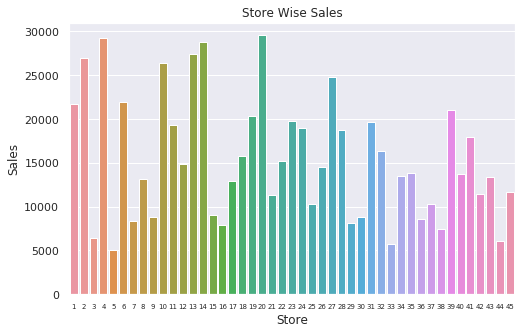

In [62]:
#exploratory data analysis for each store
df = data.groupby('Store',as_index=True)['Weekly_Sales'].mean()
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["xtick.labelsize"] = 7
sns.barplot(x=df.index,y=df.values)
plt.title("Store Wise Sales")
plt.ylabel("Sales")

Text(0, 0.5, 'Size')

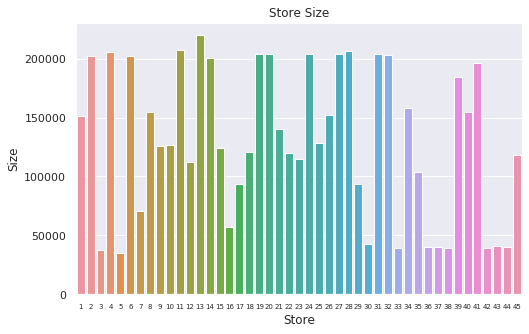

In [63]:
store_size = data.groupby('Store',as_index=True)['Size'].mean()
sns.barplot(x=store_size.index,y=store_size.values)
plt.title("Store Size")
plt.ylabel("Size")

In the first figure I used a barplot to visualize the average sales of every store,while in the second I visualized the size of each store.We can see clearly that the size of store affects the weekly sales.The bigger the store ,the higher the sales.

Let's use a line plot to observe this clearly

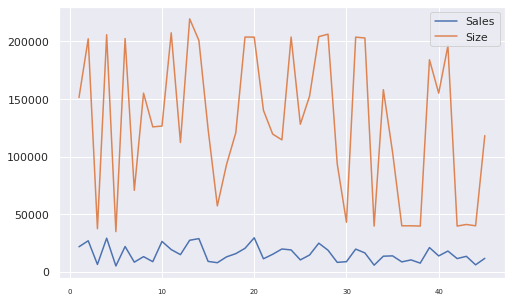

In [64]:
plt.plot(df.index,df.values,label="Sales")
plt.plot(store_size.index,store_size.values,label="Size")
plt.legend(loc="upper right")

From the figure above,we can observe that when the  store size increase the weekly sales increase and when the store size decreases the weekly sales decrease too.

let's also see how the type of store affects the sales:

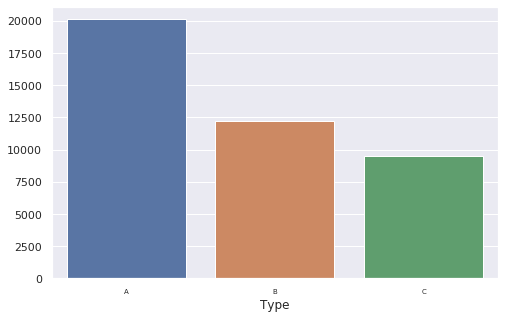

In [65]:
store_type = data.groupby('Type',as_index=True)['Weekly_Sales'].mean()
sns.barplot(x=store_type.index,y=store_type.values)



We can see clearly that the stores of type A has higher sales.

#### Analysis Datewise

Let's now explore the data datewise.We will first plot the average sales over time

Text(0, 0.5, 'Average sales')

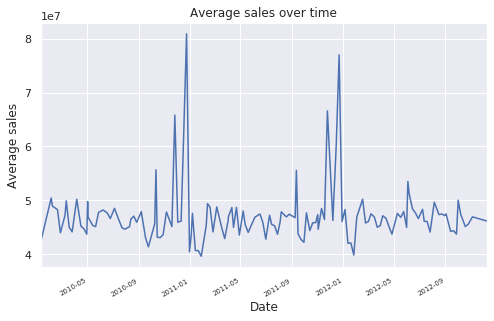

In [66]:
# eda by dates
sales = data.groupby("Date")["Weekly_Sales"].sum()
sales.plot()
plt.title('Average sales over time')
plt.ylabel("Average sales")

From the figure above,we observe that the weekly sales increases around the month of November and December.There are lower sales in the month of January.Also weeks nearby holidays shows spike

We can see this clearly by plotting average sales of each month

Text(0, 0.5, 'Average Sales')

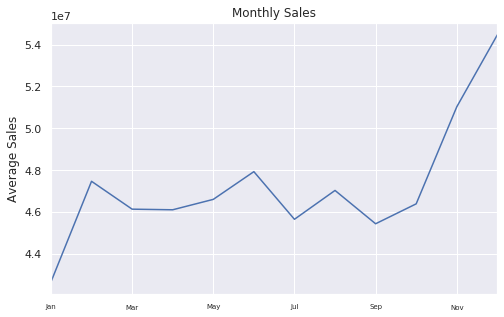

In [67]:
by_month = sales.groupby(sales.index.month).mean()
by_month.index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
by_month.plot()
plt.title("Monthly Sales")
plt.ylabel("Average Sales")

We can also plot a barplot to see clearly 

Text(0, 0.5, 'Average Sales')

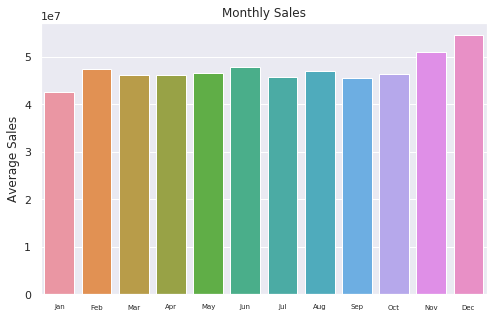

In [68]:
sns.barplot(x=by_month.index,y=by_month.values)  
plt.title("Monthly Sales")
plt.ylabel("Average Sales")

lets also explore year wise sales

Text(0, 0.5, 'Sales')

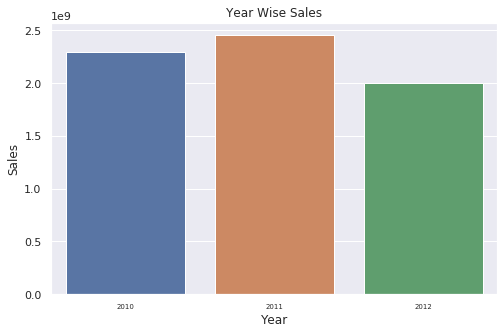

In [69]:
data_sales_year = sales.groupby(sales.index.year).sum()
sns.barplot(x = data_sales_year.index,y=data_sales_year.values)
plt.title("Year Wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

Year 2011 had the highest sales

Let's see how the other features are distributed based on the timeline.

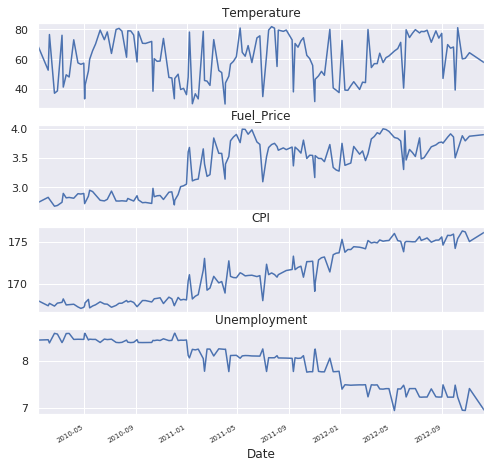

In [70]:
temp = data.groupby("Date")["Temperature"].mean()
fuel = data.groupby("Date")["Fuel_Price"].mean()
cpi = data.groupby("Date")["CPI"].mean()
unemployment = data.groupby("Date")["Unemployment"].mean()

fig,ax = plt.subplots(4,figsize=(8,8),sharex=True)
temp.plot(ax=ax[0],title="Temperature")
fuel.plot(ax=ax[1],title="Fuel_Price")
cpi.plot(ax=ax[2],title="CPI")
unemployment.plot(ax=ax[3],title="Unemployment")

- Fuel price and consumer price index shown growth over the year
- Unemployment decreased year after year
- Temperature is showing a random walk

#### Analysis of markdowns
Let's also see how each markdown affect the Weekly sales

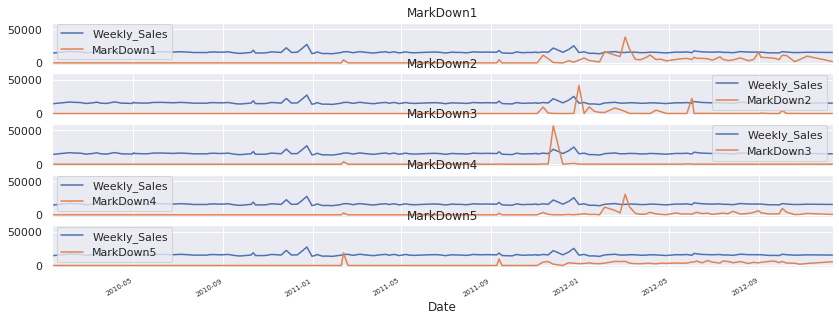

In [71]:
markdown1 = data.groupby("Date")["Weekly_Sales","MarkDown1"].mean()
markdown2 = data.groupby("Date")["Weekly_Sales","MarkDown2"].mean()
markdown3 = data.groupby("Date")["Weekly_Sales","MarkDown3"].mean()
markdown4 = data.groupby("Date")["Weekly_Sales","MarkDown4"].mean()
markdown5 = data.groupby("Date")["Weekly_Sales","MarkDown5"].mean()
fig,ax = plt.subplots(5,figsize=(14,5),sharey=True)
markdown1.plot(ax=ax[0],title="MarkDown1")
markdown2.plot(ax=ax[1],title="MarkDown2")
markdown3.plot(ax=ax[2],title="MarkDown3")
markdown4.plot(ax=ax[3],title="MarkDown4")
markdown5.plot(ax=ax[4],title="MarkDown5")

From the figure above,we observe that the sales increases,although not clear enough, when some markdowns are applied.

#### Analysis of temperature and fuel price

Lets see whether if temperature and fuel price have any effects on sales.

We will first normalize the dataset to have a mean of 0 and standard deviation of 1.

No handles with labels found to put in legend.


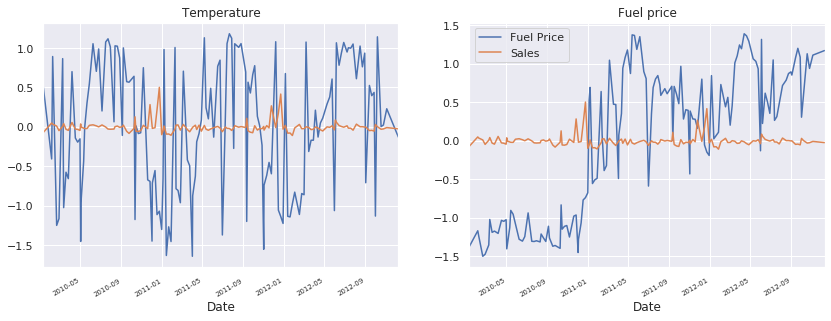

In [72]:
#normalize the data
def normalize(x,y):
    x[y] = (x[y] + abs(x[y].min()))#shift the data
    x[y] = (x[y]-x[y].mean())/x[y].std()
    return x
y=data.copy()

fig,ax = plt.subplots(1,2,figsize=(14,5))
scaled_temp = normalize(y,'Temperature')
scaled_sales = normalize(y,'Weekly_Sales')
temp = scaled_temp.groupby("Date")["Temperature"].mean()
sales = scaled_sales.groupby("Date")['Weekly_Sales'].mean()
temp.plot(ax=ax[0],label="Temperature",title="Temperature") 
sales.plot(ax=ax[0],label="Sales")
plt.legend()

fuel_price = data.groupby("Date")["Fuel_Price"].mean()
fuel_norm = normalize(data,"Fuel_Price")
scaled_sales = normalize(data,'Weekly_Sales')
fuel_price = fuel_norm.groupby("Date")["Fuel_Price"].mean()
sales = scaled_sales.groupby("Date")['Weekly_Sales'].mean()
fuel_price.plot(ax=ax[1],label="Fuel Price",title="Fuel price")
sales.plot(ax=ax[1],label="Sales")
plt.legend()


From the plot above,it is quite clear that neither the temperature nor fuel price affect our weekly sales.Therefore,we'll avoid these two features during our modelling


### Forecasting

Now we have come to the final step of data analysis,that is,modelling.We have been tasked to predict the sales for each store for the following year.

Since this is a time series problem,we need to check if it is stationary because most time series model work on assumption that a time series is stationary.A time series is said to be stationary if its statistical properties such as mean and variance remain constant over time.We can check stationarity using the following;
  - Plotting Rolling statistics.We can plot the moving average to see if it varies with time.
  - Dickey-Fuller test.This one is statistical test where the null hypothesis is that time series is non-stationary.The test results comprises of test statistics and critica values.If test satistic is less than critical  level we reject null hypothesis and say it is stationary.

We will use both.

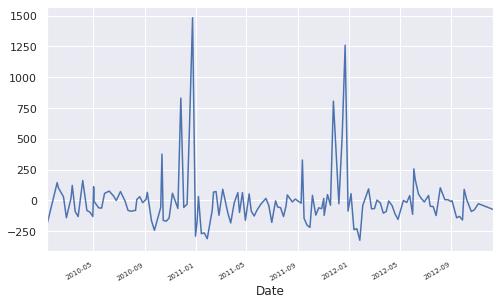

In [73]:
sales_data = data['Weekly_Sales']
sales_data = sales_data.groupby("Date").sum()
sales_data.plot()

Since we are dealing with unevenly spaced timeseries,it will be difficult to predict future values.Therefore,we need to resample it to even spaces.We will resample to daily frequencies and later to weekly frequencies.

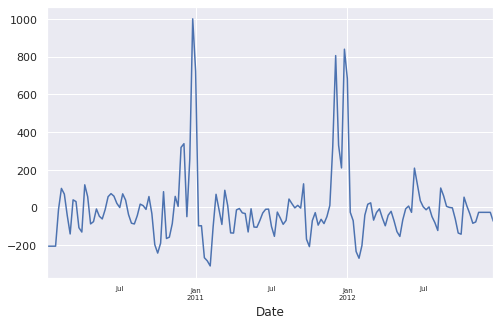

In [74]:
sales_data = sales_data.resample('D').pad()
sales_data = sales_data.resample('W').mean()
sales_data.plot()

In [75]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label="Rolling Mean")
    std = plt.plot(rolstd,color='black',label="Rolling STD")
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Deviation")
    
    #perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test")
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used',
                                            'Number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)    

Results of Dickey-Fuller Test
Test Statistic                  -5.545740
p-value                          0.000002
#Lags Used                       4.000000
Number of Observations used    149.000000
Critical Value(1%)              -3.475018
Critical Value(5%)              -2.881141
Critical Value(10%)             -2.577221
dtype: float64


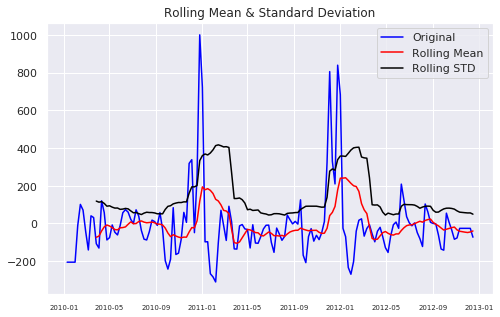

In [76]:
test_stationarity(sales_data)

From the Dickey-Fuller test,we can see that the test statistic is smaller the 1% critical values,so we can say with 99% confidence that this series is a stationary process.                                                                        

The next step is to forecast the data.We will be using the Auto-Regressive Integrated Moving Averages(ARIMA) model to forecast.The ARIMA forecasting for a stationary time series is nothing but a linear equation.The predictors depend on parameters(p,d,q) of the ARIMA model.We use Autocorrelation Function(ACF) and Partial Autocorrelation Function(PACF) plots to determine the value of 'p' and 'q'.

Text(0.5, 1.0, 'Partial Autocorrelation Function')

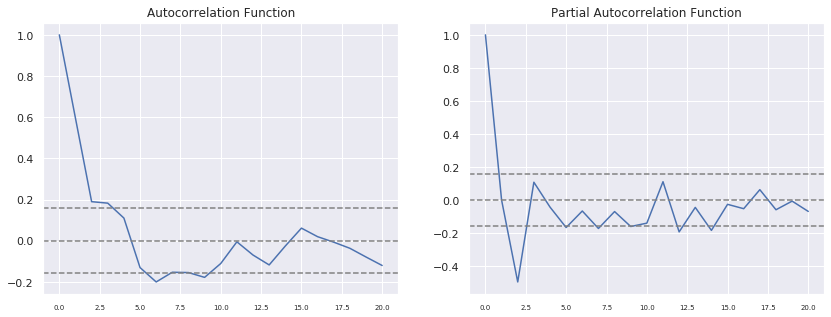

In [77]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(sales_data,nlags=20,fft=False)
lag_pacf = pacf(sales_data_diff,nlags=20,method='ols')

#plot acf
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(lag_acf)
ax[0].axhline(y=0,linestyle='--',color='gray')
ax[0].axhline(y=-1.96/np.sqrt(len(sales_data_diff)),linestyle='--',color='gray')
ax[0].axhline(y=1.96/np.sqrt(len(sales_data_diff)),linestyle='--',color='gray')
ax[0].set_title("Autocorrelation Function")

#plot pacf
ax[1].plot(lag_pacf)
ax[1].axhline(y=0,linestyle='--',color='gray')
ax[1].axhline(y=-1.96/np.sqrt(len(sales_data_diff)),linestyle='--',color='gray')
ax[1].axhline(y=1.96/np.sqrt(len(sales_data_diff)),linestyle='--',color='gray')
ax[1].set_title('Partial Autocorrelation Function')

The two dotted lines on both sides of 0 are the confidence intervals.We will use these to detemine the values of p and q.
  - p ;the lag value where the pacf chart crosses the upper confidence interval for the first time.In this case p=2.
  - q ;the lag value where the acf chart crosses the upper confidence interval for the first time.In this case q=2.
  
Now,lets make an ARIMA model.  

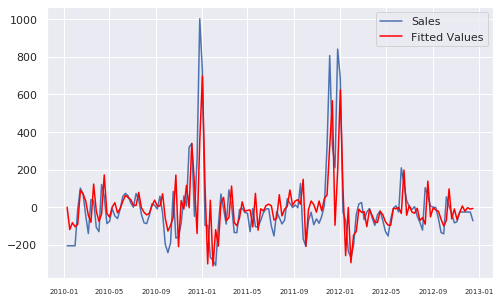

In [78]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(sales_data,order=(1,0,3))
results_arima = model.fit(disp=-1)
plt.plot(sales_data,label='Sales')
plt.plot(results_arima.fittedvalues,color='red',label="Fitted Values")
plt.legend(loc='best')

In [79]:
#predicting the next year
sales_pred = results_arima.predict(start='2012-11-11',end=197,exog=None, dynamic=False)
sales_pred.head(5)

2012-11-11   -28.778454
2012-11-18     6.295018
2012-11-25   -21.679217
2012-12-02    -2.970665
2012-12-09   -10.576948
Freq: W-SUN, dtype: float64

There we have it:We have been able to predict the sales of the following year successfully.

## Conclusions
I hope you find this notebook useful and enjoyable.

If you have spotted any errors or would like to contribute to this notebook,please don't hesitate to get in touch.I can be reached in the following ways;


   * [Email](mailto:kamaudenise@gmail.com) me
   
   * [Submit an issue](https://github.com/KamauDennis/datascience_projects/issues) on Github
   
   * [Linkedin](https://linkedin.com/in/kamau-dennis-64a75a137) me